<a href="https://colab.research.google.com/github/Number1MarsMan/googleColabProjects/blob/main/Engineering-Ethan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: pip install kaggle

!pip install kaggle


In [ ]:
# prompt: download the databse from the website https://www.kaggle.com/datasets/udaymalviya/bank-loan-data/data and save into an array

import pandas as pd

# Assuming you have already configured Kaggle API and the kaggle.json is in the correct location
# as described in previous responses.
!kaggle datasets download -d udaymalviya/bank-loan-data

# Unzip the downloaded file
!unzip bank-loan-data.zip

# Load the dataset into a pandas DataFrame
data = pd.read_csv('loan_data.csv')  # Replace 'bank_loan_data.csv' with the actual filename if different

# Convert the DataFrame to a NumPy array if needed
data_array = data.values

# Now data_array holds the data from the CSV file in a NumPy array format.
data_array


Dataset URL: https://www.kaggle.com/datasets/udaymalviya/bank-loan-data
License(s): MIT
bank-loan-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bank-loan-data.zip
replace loan_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

array([[22.0, 'female', 'Master', ..., 561, 'No', 1],
       [21.0, 'female', 'High School', ..., 504, 'Yes', 0],
       [25.0, 'female', 'High School', ..., 635, 'No', 1],
       ...,
       [33.0, 'male', 'Associate', ..., 668, 'No', 1],
       [29.0, 'male', 'Bachelor', ..., 604, 'No', 1],
       [24.0, 'male', 'High School', ..., 628, 'No', 1]], dtype=object)

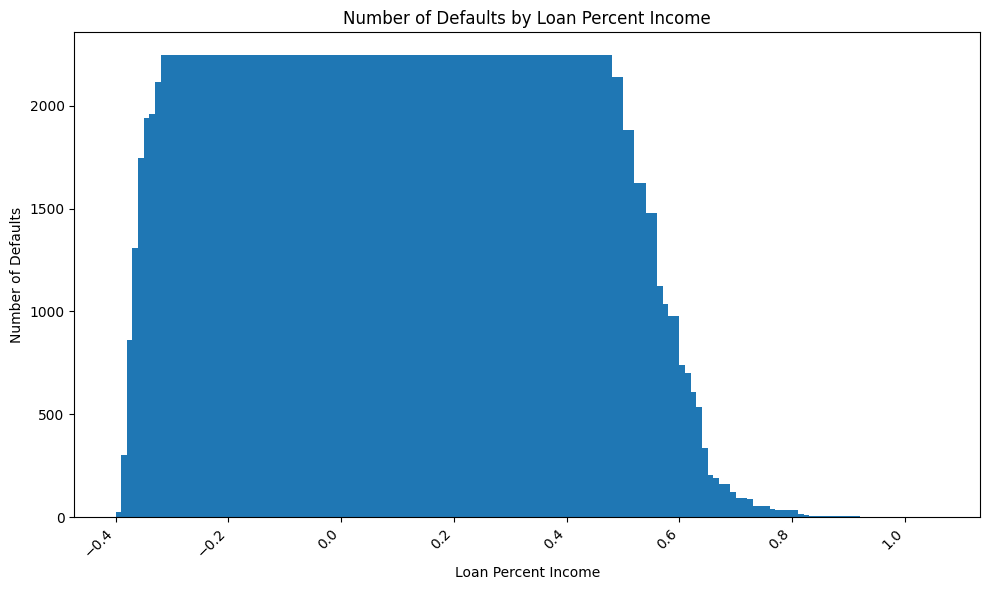

In [ ]:
# prompt: I want to make a bar graph plotting the number of people who default, which is loan_status = 0, for a range of loan_percent_income

import matplotlib.pyplot as plt

# Group by loan_percent_income and count defaults
defaults_by_income = data.groupby('loan_percent_income')['loan_status'].apply(lambda x: (x == 0).sum()).reset_index()

# Rename the columns for clarity
defaults_by_income.columns = ['loan_percent_income', 'default_count']

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(defaults_by_income['loan_percent_income'], defaults_by_income['default_count'])
plt.xlabel('Loan Percent Income')
plt.ylabel('Number of Defaults')
plt.title('Number of Defaults by Loan Percent Income')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


<ipython-input-23-b2708ff5512a>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  defaults_by_income_group = data.groupby('loan_percent_income_group')['loan_status'].apply(lambda x: (x == 0).sum()).reset_index()


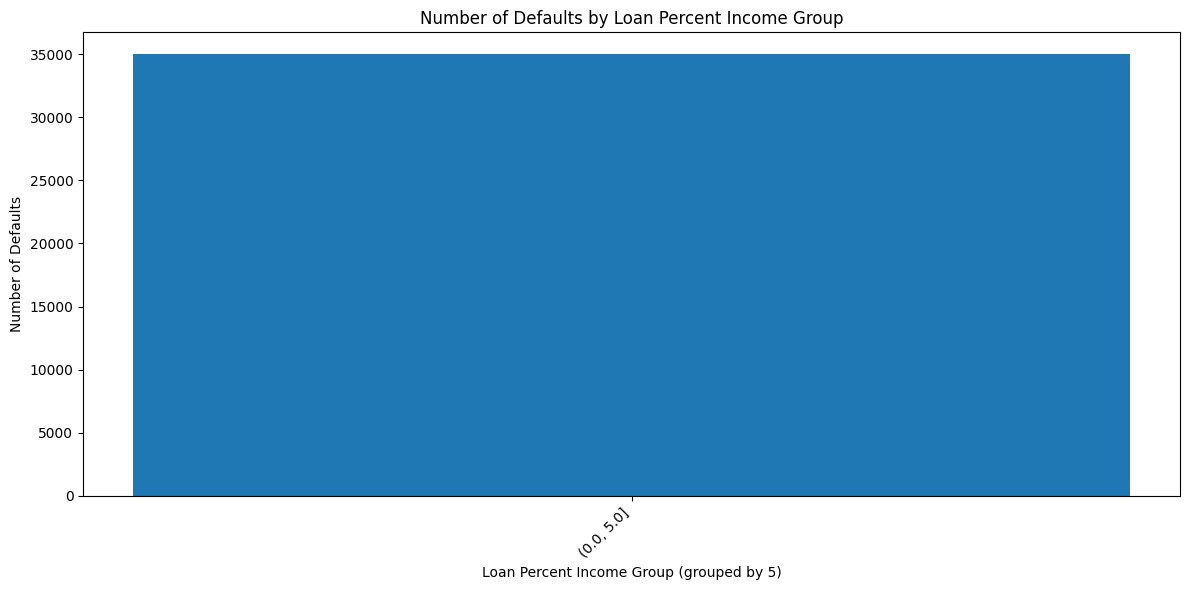

In [ ]:
# prompt: I want you to group every 5 defaults together or number , then graph against loan percent income, do not group loan percent income

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ... (Your existing code to load the data) ...

# Group loan_percent_income into bins of 5
data['loan_percent_income_group'] = pd.cut(data['loan_percent_income'], bins=np.arange(data['loan_percent_income'].min(), data['loan_percent_income'].max() + 5, 5))


# Group by the new income group and count defaults
defaults_by_income_group = data.groupby('loan_percent_income_group')['loan_status'].apply(lambda x: (x == 0).sum()).reset_index()

# Rename columns
defaults_by_income_group.columns = ['loan_percent_income_group', 'default_count']


# Plotting
plt.figure(figsize=(12, 6))
plt.bar(defaults_by_income_group['loan_percent_income_group'].astype(str), defaults_by_income_group['default_count'])  # Convert to string for x-axis labels

plt.xlabel('Loan Percent Income Group (grouped by 5)')
plt.ylabel('Number of Defaults')
plt.title('Number of Defaults by Loan Percent Income Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
